## Microbes(Bacteria and Archaea) Name Taxanomy Classification by taking read as input

In [11]:
import torch, gc
import math
import numpy as np
import pandas as pd
import pickle as pkl

gc.collect()
torch.cuda.empty_cache()

use_cuda = torch.cuda.is_available()

if not use_cuda:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [12]:
from torchvision import datasets, transforms

path='/content/drive/My Drive/Metagenomics/Bacteria/'

data=pd.read_csv(path+'data/Name/'+"data_name.csv")
target_name=data['name']
feature_read=data['read']
print(len(feature_read))

875


In [ ]:
path='/content/drive/My Drive/Metagenomics/Bacteria/Name/'
train_data= pd.read_csv(path+"train.csv")
valid_data= pd.read_csv(path+"valid.csv")
test_data= pd.read_csv(path+"test.csv")

In [ ]:
print(len(train_data))
print(len(valid_data))
print(len(test_data))

500
300
75


In [ ]:
train_target=train_data['name']
train_feature=train_data['read']
valid_target=valid_data['name']
valid_feature=valid_data['read']
test_target=test_data['name']
test_feature=test_data['read']

In [13]:
classes=sorted(set(target_name))
class_dict={y:x for x,y in enumerate(classes)}
len(class_dict)

25

In [14]:
sets= {'A','C','G','T','U','W','S','M','K','R','Y','B','D','H','V','N','Z'}
char=sorted(sets)
char_encode={y:x+1 for x,y in enumerate(char)}
char_encode

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'G': 5,
 'H': 6,
 'K': 7,
 'M': 8,
 'N': 9,
 'R': 10,
 'S': 11,
 'T': 12,
 'U': 13,
 'V': 14,
 'W': 15,
 'Y': 16,
 'Z': 17}

In [ ]:
path='/content/drive/My Drive/Metagenomics/Bacteria/Name/'
train_path1 = path + 'train_input.pkl'
train_path2 = path + 'train_target.pkl'
valid_path1 = path + 'valid_input.pkl'
valid_path2 = path + 'valid_target.pkl'
test_path1 = path + 'test_input.pkl'
test_path2 = path + 'test_target.pkl'
train_file1 = open(train_path1, 'wb')
train_file2 = open(train_path2, 'wb')
valid_file1 = open(valid_path1, 'wb')
valid_file2 = open(valid_path2, 'wb')
test_file1 = open(test_path1, 'wb')
test_file2 = open(test_path2, 'wb')
def f(feature,target,file1,file2):
  lst1=[]
  lst2=[]
  save=True
  if save:
    for i,j in enumerate(feature):
      read=np.zeros(1650)
      for x,y in enumerate(j):
            read[x]=char_encode[y]
      read=read.reshape(33,50)
      lst1.append(read/20)
      lst2.append(np.array([class_dict[target[i]]]))
  pkl.dump(lst1,file1)
  pkl.dump(lst2,file2)
  file1.close()
  file2.close()

f(train_feature,train_target,train_file1,train_file2)
f(valid_feature,valid_target,valid_file1,valid_file2)
f(test_feature,test_target,test_file1,test_file2)

In [15]:
path='/content/drive/My Drive/Metagenomics/Bacteria/Name/'

from torch.utils.data import TensorDataset, DataLoader

num_workers=0
batch_size = 20

train_path1 = path + 'train_input.pkl'
train_path2 = path + 'train_target.pkl'

valid_path1 = path + 'valid_input.pkl'
valid_path2 = path + 'valid_target.pkl'

test_path1 = path + 'test_input.pkl'
test_path2 = path + 'test_target.pkl'

train_file1 = open(train_path1, 'rb')
train_file2 = open(train_path2, 'rb')

valid_file1 = open(valid_path1, 'rb')
valid_file2 = open(valid_path2, 'rb')

test_file1 = open(test_path1, 'rb')
test_file2 = open(test_path2, 'rb')


train_input = pkl.load(train_file1)
train_target = pkl.load(train_file2)

valid_input = pkl.load(valid_file1)
valid_target = pkl.load(valid_file2)

test_input = pkl.load(test_file1)
test_target = pkl.load(test_file2)

train_x = torch.Tensor(train_input)
train_y = torch.Tensor(train_target)

valid_x = torch.Tensor(valid_input)
valid_y = torch.Tensor(valid_target)

test_x = torch.Tensor(test_input)
test_y = torch.Tensor(test_target)

train_file1.close()
train_file2.close()

valid_file1.close()
valid_file2.close()

test_file1.close()
test_file2.close()

train_dataset = TensorDataset(train_x,train_y.long())
valid_dataset = TensorDataset(valid_x,valid_y.long())
test_dataset = TensorDataset(test_x,test_y.long())

train_loader = DataLoader(train_dataset,batch_size=batch_size, shuffle= True)
valid_loader = DataLoader(valid_dataset,batch_size=batch_size, shuffle= True)
test_loader = DataLoader(test_dataset,batch_size=batch_size, shuffle= True)

loaders = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

In [ ]:
dataiter = iter(valid_loader)
images, labels = dataiter.next()
print("Input: ",images," Label: ",labels)

Input:  tensor([[[0.0500, 0.2500, 0.0500,  ..., 0.0500, 0.6000, 0.2500],
         [0.1500, 0.0500, 0.0500,  ..., 0.2500, 0.0500, 0.6000],
         [0.6000, 0.6000, 0.2500,  ..., 0.6000, 0.2500, 0.1500],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0500, 0.6000, 0.6000,  ..., 0.6000, 0.2500, 0.1500],
         [0.1500, 0.6000, 0.0500,  ..., 0.2500, 0.2500, 0.2500],
         [0.6000, 0.2500, 0.0500,  ..., 0.0500, 0.0500, 0.0500],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.6000, 0.6000,  ..., 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.0500,  ..., 0.1500, 0.2500, 0.1500],
         [0.0500, 0.6000, 0.2500,  ..., 0.1500, 0.

In [16]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F

# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=False):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                           kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
    
    layers.append(conv_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [17]:
# helper avg_pool function
def pool(out_channels,kernel_size=2, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    pool_layer = nn.AvgPool2d(kernel_size, stride, padding)
    layers.append(pool_layer)

    if batch_norm:
        layers.append(nn.BatchNorm2d(out_channels))
    return nn.Sequential(*layers)

In [18]:
# residual block class
class ResidualBlock(nn.Module):
    """Defines a residual block.
       This adds an input x to a convolutional layer (applied to x) with the same size input and output.
       These blocks allow a model to learn an effective transformation from one domain to another.
    """
    def __init__(self, conv_dim,nf1=1,nf2=1):
        super(ResidualBlock, self).__init__()
        # conv_dim = number of inputs
        
        # define two convolutional layers + batch normalization that will act as our residual function, F(x)
        # layers should have the same shape input as output; I suggest a kernel_size of 3
        
        self.conv_dim_rslv_layer = conv(in_channels=conv_dim*nf1, out_channels=conv_dim*nf2, 
                                kernel_size= 3, stride=1, padding=1)
        self.conv_layer1 = conv(in_channels=conv_dim*nf1, out_channels=conv_dim*nf2, 
                                kernel_size= 3, stride=1, padding=1,batch_norm=True)
        
        self.conv_layer2 = conv(in_channels=conv_dim*nf2, out_channels=conv_dim*nf2, 
                               kernel_size= 3, stride=1, padding=1)
        
    def forward(self, x):
        # apply a ReLu activation the outputs of the first layer
        # return a summed output, x + resnet_block(x)
        out_1 = F.relu(self.conv_layer1(x)) 
        y= self.conv_layer2(out_1)
        if x.size()[1]!=y.size()[1]:
           x= self.conv_dim_rslv_layer(x)
        out_2 = x + y
        return out_2
    

In [19]:
total_classes= 25

class  GeNet(nn.Module):
    
    def __init__(self, conv_dim=128, n_res_blocks=4):
        super(GeNet, self).__init__()

        # 1. Define the encoder part of the generator
        
        # initial convolutional layer given, below
        self.conv1 = conv(1, conv_dim, 4)
      
        self.avg_pool = pool(2*conv_dim,kernel_size=[2,1],stride=[2,1],padding=0)
        # 2. Define the resnet part of the generator
        # Residual blocks
        res_layers = []

        res_layers.append(pool(conv_dim))
        res_layers.append(ResidualBlock(conv_dim))
        
        res_layers.append(pool(conv_dim))
        res_layers.append(ResidualBlock(conv_dim))
        
        res_layers.append(pool(conv_dim))
        res_layers.append(ResidualBlock(conv_dim,nf2=2))

        res_layers.append(pool(2*conv_dim))
        res_layers.append(ResidualBlock(conv_dim,nf1=2,nf2=2))

        # use sequential to create these layers
        self.res_blocks = nn.Sequential(*res_layers)
        
        fc_layers=[]
        # fully-connected
        fc_layers.append(nn.Linear(768,384))
        fc_layers.append(nn.Dropout2d(p=0.20))
        fc_layers.append(nn.ReLU())
        fc_layers.append(nn.Linear(384,768))
        fc_layers.append(nn.Dropout2d(p=0.20))
        fc_layers.append(nn.ReLU())
        fc_layers.append(nn.Linear(768,total_classes))

        # use sequential to create these layers
        self.fc = nn.Sequential(*fc_layers)


         # drop-out
        self.drop_out= nn.Dropout2d(p=0.20)

    def forward(self, x):
        """Given an image x, returns a transformed image."""
        # define feedforward behavior, applying activations as necessary

        out = F.relu(self.conv1(x))
        out = F.relu(self.drop_out(self.res_blocks(out)))
        out = self.avg_pool(out)

         # Flatten
        out = out.view(-1, 768)
        
        # tanh applied to last layer
        out = self.fc(out)
        return F.log_softmax(out, dim=1)

# instantiate the CNN
model = GeNet()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model.cuda()

In [20]:
model.parameters

<bound method Module.parameters of GeNet(
  (conv1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (avg_pool): Sequential(
    (0): AvgPool2d(kernel_size=[2, 1], stride=[2, 1], padding=0)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (res_blocks): Sequential(
    (0): Sequential(
      (0): AvgPool2d(kernel_size=2, stride=2, padding=1)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv_dim_rslv_layer): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (conv_layer1): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv_layer2): Sequential(
        (0): Conv2d(128, 128

In [113]:
# Do not uncomment this cell but add this
from collections import OrderedDict
model_transfer = GeNet() 
model_transfer.load_state_dict(torch.load(path+'bacteria_name_0.pt'))

layers= OrderedDict()
mod = list(model_transfer.fc.children())
mod[-1]=nn.Linear(768,384)
mod.append(nn.Dropout2d(p=0.40))
mod.append(nn.ReLU())
mod.append(nn.Linear(384,192))
mod.append(nn.Dropout2d(p=0.40))
mod.append(nn.ReLU())
mod.append(nn.Linear(192,25))

layer=['fc','drop_out','relu']
c=0
while len(mod)!=1:
    for i,j in zip(layer,mod):
        layers[i+str(c)]=j
    c+=1
    mod=mod[3:]
else:
    layers['fc'+str(c)]=mod[-1]

new_fc = nn.Sequential(layers)
model_transfer.fc=new_fc
model_transfer.fc

Sequential(
  (fc0): Linear(in_features=768, out_features=384, bias=True)
  (drop_out0): Dropout2d(p=0.2, inplace=False)
  (relu0): ReLU()
  (fc1): Linear(in_features=384, out_features=768, bias=True)
  (drop_out1): Dropout2d(p=0.2, inplace=False)
  (relu1): ReLU()
  (fc2): Linear(in_features=768, out_features=384, bias=True)
  (drop_out2): Dropout2d(p=0.4, inplace=False)
  (relu2): ReLU()
  (fc3): Linear(in_features=384, out_features=192, bias=True)
  (drop_out3): Dropout2d(p=0.4, inplace=False)
  (relu3): ReLU()
  (fc4): Linear(in_features=192, out_features=25, bias=True)
)

In [114]:
for param in model_transfer.parameters():
    param.requires_grad = False


c=0
for param in model_transfer.fc.parameters():
    if c>3:
       param.requires_grad = True
    if c%2==0:
       size="weight_size"
    else:
       size="bias_size"
    print(f"fc{c} : {size}({param.size()}) require_grad= {param.requires_grad}") 
    c+=1

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_transfer.cuda()

fc0 : weight_size(torch.Size([384, 768])) require_grad= False
fc1 : bias_size(torch.Size([384])) require_grad= False
fc2 : weight_size(torch.Size([768, 384])) require_grad= False
fc3 : bias_size(torch.Size([768])) require_grad= False
fc4 : weight_size(torch.Size([384, 768])) require_grad= True
fc5 : bias_size(torch.Size([384])) require_grad= True
fc6 : weight_size(torch.Size([192, 384])) require_grad= True
fc7 : bias_size(torch.Size([192])) require_grad= True
fc8 : weight_size(torch.Size([25, 192])) require_grad= True
fc9 : bias_size(torch.Size([25])) require_grad= True


In [121]:
import torch.optim as optim

loaders_transfer = loaders
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

In [120]:
train_losses, valid_losses = [], [] 

def train(n_epochs, loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loader['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            # initialize weights to zero
            optimizer.zero_grad()
            data = data.unsqueeze(1)
            output = model(data)
            target = target.squeeze(1)
            # calculate the loss
            loss = criterion(output,target)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # parameter update
            optimizer.step()
            
            # update running training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
       ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loader['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            data = data.unsqueeze(1)
            output = model(data)
            target = target.squeeze(1)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        new_data = {'epochs': [epoch],
            'trainlosses': [train_loss],
            'vallosses': [valid_loss] }
       
        train_losses.append(train_loss) 
        valid_losses.append(valid_loss)  
  
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss has decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss

    # return trained model
    return model

In [122]:
# train the model
n_epochs= 3000
#model.load_state_dict(torch.load(path+'bacteria_name_1.pt'))
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda,path+'bacteria_name_1.pt')

Epoch: 1 	Training Loss: 0.078328 	Validation Loss: 1.655057
Validation loss has decreased (inf --> 1.655057).  Saving model ...
Epoch: 2 	Training Loss: 0.067855 	Validation Loss: 1.630763
Validation loss has decreased (1.655057 --> 1.630763).  Saving model ...
Epoch: 3 	Training Loss: 0.089550 	Validation Loss: 1.636094
Epoch: 4 	Training Loss: 0.070715 	Validation Loss: 1.634069
Epoch: 5 	Training Loss: 0.063581 	Validation Loss: 1.631274
Epoch: 6 	Training Loss: 0.066826 	Validation Loss: 1.640399
Epoch: 7 	Training Loss: 0.081662 	Validation Loss: 1.642333
Epoch: 8 	Training Loss: 0.079694 	Validation Loss: 1.635005
Epoch: 9 	Training Loss: 0.078947 	Validation Loss: 1.640908
Epoch: 10 	Training Loss: 0.067313 	Validation Loss: 1.623198
Validation loss has decreased (1.630763 --> 1.623198).  Saving model ...
Epoch: 11 	Training Loss: 0.060962 	Validation Loss: 1.635889
Epoch: 12 	Training Loss: 0.076876 	Validation Loss: 1.624451
Epoch: 13 	Training Loss: 0.081921 	Validation Loss

KeyboardInterrupt: ignored

In [105]:
model.load_state_dict(torch.load(path+'bacteria_name_0.pt'))

<All keys matched successfully>

In [123]:
def test(loader, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loader['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        data = data.unsqueeze(1)
        output = model(data)
        target = target.squeeze(1)
        
        # calculate the loss
        loss = criterion(output, target)

        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [125]:
# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.785857


Test Accuracy: 64% (48/75)


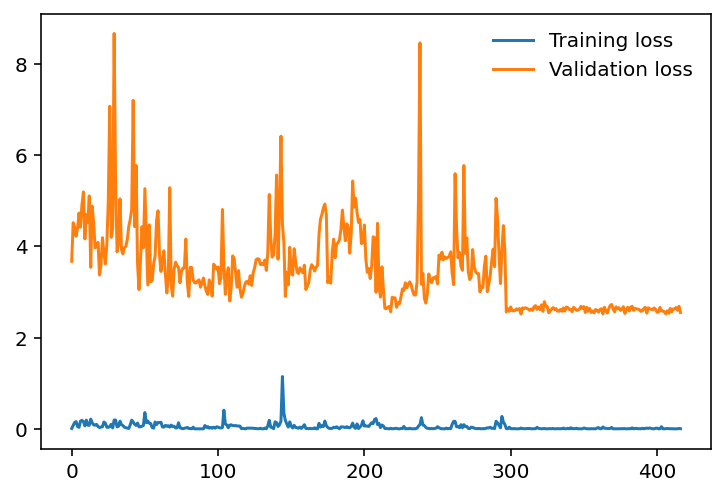

In [107]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [70]:
model_transfer = GeNet()

In [127]:
###  a function that takes a path to a read as input
### and returns the taxanomy as kingdom that is predicted by the model.

model_transfer.load_state_dict(torch.load(path+'bacteria_name_1.pt'))

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = classes

def predict_taxa_transfer(seq):
    
    # load the read and return the predicted taxa
    input=0
    
    read=np.zeros(1650)
    for x,y in enumerate(seq):
        read[x]=char_encode[y]
    read=read.reshape(33,50)
    input=read/20

    tensor_r = torch.Tensor(input).unsqueeze(0).unsqueeze(0)

    if use_cuda:
        tensor_r = tensor_r.cuda()
    
    model = model_transfer.cuda()
    model.eval()
    output = model(tensor_r)
    
    # convert output probabilities to predicted class
    _, pred_tensor = torch.max(output, 1)
    index = np.squeeze(pred_tensor.numpy()) if not use_cuda else np.squeeze(pred_tensor.cpu().numpy())
    return class_names[index]

In [46]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(seq,taxa):
    
      prediction = predict_taxa_transfer(seq)
      print(f"Input read: {seq}")
      print(f"Correct class: {taxa}")
      print(f"Predicted class: {prediction}")  


In [128]:
inference_read = [
                  'GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGGAGTTTAACTGGAAGCACTTGTGCGACCGGATAAACTTAGCGGCGGACGGGTGAGTAACACGTGAGCAACCTACCTATCGCAGGGGAACAACATTGGGAAACCAGTGCTAATACCGCATAACATCTTTTGGGGGCATCCCCGGAAGATCAAAGGATTTCGATCCGGCGACAGATGGGCTCGCGTCCGATTAGCTAGTTGGTAAGGTAAAAGCTTACCAAGGCAACGATCGGTAGCCGAACTGAGAGGTTGATCGGCCACATTGGGACTGAGACACGGCCCAGGCTCCTACGGGAGGCAGCAGTGGGGAATATTGGGCAATGGGGGAAACCCTGACCCAGCAACGCCGCGTGAAGGAAGAAGGCCTTCGGGTTGTAAACTTCTTTGATCAGGGACGAAACAAATGACGGTACCTGAAGAACAAGTCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGACAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGTTTCGTAAGTTGGATGTGAAATTCTCAGGCTTAACCTGAGAGGGTCATCCAAAACTGCAAAACTTGAGTACTGGAGAGGATAGTGGAATTCCTAGTGTAGCGGTAAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGACTATCTGGACAGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATACTAGGTGTAGGGGGTATCGACCCCCCCTGTGCCGCAGCTAACGCAATAAGTATTCCACCTGGGGAGTACGACCGCAAGGTTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCAGTGGAGTATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGGCTTGACATCCTCTGACGGCTGTAGAGATACAGCTTTCCCTTCGGGGACAGAGAGACAGGTGGTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCCTATGGTCAGTTGCCAGCACGTAATGGTGGGCACTCTGGCAAGACTGCCGTTGATAAAACGGAGGAAGGTGGGGACGACGTCAAATCATCATGCCCCTTATGTCCTGGGCTACACACGTACTACAATGGCAACAACAGAGGGCAGCCAGGTCGCGAGGCCGAGCGAATCCCAAAATGTTGTCTCAGTTCAGATTGCAGGCTGCAACTCGCCTGCATGAAGTCGGAATTGCTAGTAATGGCAGGTCAGCATACTGCCGTGAATACGTTCCCGGGTCTTGTACACACCGCCCGTCACACCATGAGAGTTTGTAACACCCGAAGTCAGTAGTCTGACCGTAAGGAGGGCGCTGCCGAAGGTGGGACAGATAATTGGGGTG',
                  'GCCCTTAGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATTAAAGCTCACTTCGGTGAGTGTATAGAGTGGCGAACGGGTGAGTAACACGTGGGCAACCTGCCCCTCACACTGGGATAACCATTGGAAACGATGGCTAATACCGGATACTCCGACGAGATCGCATGGTCTTGTCGGGAAAGCTCCGGCGGTGAGGGATGGGCCCGCGGCCCATTAGCTTGTTGGTGAGGTAACGGCTCACCAAGGCAACGATGGGTAGCCGAGCTGAGAGGCTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGGGGCAGCAGTGGGGAATTTTGCGCAATGGGCGAAAGCCTGACGCAGCAACGCCGCGTGCGGGATGAAGGCCCTCGGGTTGTAAACCGCTTTCAGCAGGGATGAGATTGACAGTACCTGCAGAAGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTGTAGGCGGCTTGTTAAGTCAGATGTGAAAACCGGGGGCTCAACCCGCGGCCTGCATCTGAAACTGGCAGGCTTGAGTCTGGTAGAGGAAAGTGGAATTCCTAGTGTAGCGGTGAAATGCGCAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTTCTGGGGCCACGACTGACGCTGAGACGCGAAAGCTAGGGGAGCGAACAGGATTAGGTACCCTGGTAGTCCTAGCCGTAAACGATGGGCACTAGGTGTGGGGGGTCATCGACTCCCTCCGTGCCGTAGCTAACGCATTAAGTGCCCCGCCTGGGGAGTACGGCCGCAAGGCTAAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCAGCGGAGCATGTGGCTTAATTCGACGCAACGCGAAGAACCTTACCAGGGCTTGACATGCAGAGAAAAGCGGCGGAAACGTCGTGTCCGAAAGGGCTCTGCACAGGTGGTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCCTGTCGTATGTTGCCAGCATTTAGTTGGGGACTCATACGAGACTGCCGGCGTCAAGCCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGCCCCTTATGTCCTGGGCTGCACACGTGCTACAATGGCCGGTACAATGGGCTGCGATACCGCGAGGTGGAGCGAATCCCATAAAACCGGCCCCAGTTCGGATCGGAGGCTGCAACTCGCCTCCGTGAAGTCGGAGTTGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCTGGGCCTTGTACATACCGCCCGTCACACCACCCGAGTTGTCTGCACCCGAAGTCGCTGTCCCAACCCTTTGGGAGGGAGGCGCCGAAGGTGTGGAGAGTAAGGGGGGTGAAGTCGTAACAAGGTAGCCGTACCGGAAGGTGCGGCTGGATCACCTCCTTAAGGGC',
                  'GATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGGTAACAGGAGAAGCTTGCTTCTCGCTGACGAGCGGCGGACGGCTGAGTAACGCGTAGGAACGTACCCCAAAGTGAGGGATAATTCACCGAAAGGTGAACTAATACCGCATGTGCTCTAAGGAGTAAAGCTACGGCGCTTTGGGAACGGCCTGCGTCCGATTAGCTAGTTGGTAGTGGTAATGGCCTACCAAGGTTACGATCGGTAGCTGGTCTGAGAGGATGATCAGCCAGACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTAGGGAATTTTCCACAATGGGCGCAAGCCTGATGGAGCAACGCCGCGTGCAGGATGACGGCCTTCGGGTTGTAAACTGCTTTTCTTTGTGACGACAATGACAGTAGCAAAGGAATAAGGATCTGCTAACTACGTGCCAGCAGCCGCGGTCATACGTAGGATCCAAGCGTTATCCGGATTTACTGGGCGTAAAGAGTTGCGTAGGTGGTTCGTTAAGCAAGACATGAAATCGTGTGGCTCAACCATACGGCTATGTTTTGAACTGATGAACATGAGAACGAGAGAGGTGGCTGGAATTCCCAGTGTAGGAGTGAAATCCGTAGATATTGGGAGGAACACCGATGGCGTAGGCAGGCCACTGGCTCGTTTCTGACACTGAGGCACGAAAGCGTGGGGAGCAAACGGGATTAGATACCCCGGTAGTCCACGCCGTAAACTATGGATGCTAGCTGTATAGAGTATCGACCCTCTGTGTAGCGAAGCTAACGCGTTAAGCATCCCGCCTGGGTAGTACGGTCGCAAGACTAAAACCTAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCGTGTTGTTTAATTCGATGATAAGCGAAGAACCTTACCAAGACTTGACATCCTGAGAATTTCTATGAAAGTAGAGAGTGCCTTTTGGAACTCAGTGACAGGTGTTGCATGGCCGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATGTTTAGTTGTATTTTTCTAAACAGACTGCCCTGGTAACAGGGAGGAAGGAGGGGATGATGCCAGGTCAGTATTACCCTTACGTCTTGGGCTACAAACACGCTACAATGGCCGGTACAAAGGGAAGCCAACCCGCGAGGGGGAGCAAATCCCATCAAAGCCGGTCCCAGTTCGGATTGTAGGCTGAAACTCGCCTGCATGAAGTCGGAATCGCTAGTAACGGTAGGTCAGCACACTACCGTGAATACGTTCCCGGGTCTTGTACACACCGCCCGTCAAGCCATGAAAGTCACCAACACCCAAAGTATGAGCATTGCCTCGTCCTAAGGT'
                 ]
inference_taxa = ['Saccharofermentans acetigenes','Coriobacteriaceae Species','Saccharibacteria Species'] 

for seq,taxa in zip(inference_read,inference_taxa):
    run_app(seq,taxa)

Input read: GATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGGAGTTTAACTGGAAGCACTTGTGCGACCGGATAAACTTAGCGGCGGACGGGTGAGTAACACGTGAGCAACCTACCTATCGCAGGGGAACAACATTGGGAAACCAGTGCTAATACCGCATAACATCTTTTGGGGGCATCCCCGGAAGATCAAAGGATTTCGATCCGGCGACAGATGGGCTCGCGTCCGATTAGCTAGTTGGTAAGGTAAAAGCTTACCAAGGCAACGATCGGTAGCCGAACTGAGAGGTTGATCGGCCACATTGGGACTGAGACACGGCCCAGGCTCCTACGGGAGGCAGCAGTGGGGAATATTGGGCAATGGGGGAAACCCTGACCCAGCAACGCCGCGTGAAGGAAGAAGGCCTTCGGGTTGTAAACTTCTTTGATCAGGGACGAAACAAATGACGGTACCTGAAGAACAAGTCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGACAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGTTTCGTAAGTTGGATGTGAAATTCTCAGGCTTAACCTGAGAGGGTCATCCAAAACTGCAAAACTTGAGTACTGGAGAGGATAGTGGAATTCCTAGTGTAGCGGTAAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGACTATCTGGACAGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATACTAGGTGTAGGGGGTATCGACCCCCCCTGTGCCGCAGCTAACGCAATAAGTATTCCACCTGGGGAGTACGACCGCAAGGTTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCAGTGGAGTATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGGCTTGACATCCTCTGACGGCTGTAGAGATACAGCT